In [12]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

[[ 15. 106.  89. 152.   4. 158.  41. 239. 227. 172. 192.   5.  54. 169.
  253.  74. 182. 169.  28. 115.  86. 194. 132. 196. 141. 253. 106.  14.
  197. 206.]
 [206.  12. 214. 205. 212. 153.  63.  92. 124.  27. 249. 205.  27. 142.
   51.  74. 231. 193.  28.  75.  80. 244.  15. 119.  51. 217.  66. 159.
   59.  78.]
 [ 94. 208. 156. 209.  61. 204. 222. 107. 179. 157. 126. 138.  60. 144.
   95.  75. 162. 252.  55. 171.  34.  35. 206. 217. 236. 138. 238. 167.
  121.  51.]
 [ 43.  56.  36. 246. 218. 185.  47.  13. 153. 175. 142. 228. 153.  60.
  139.  68. 199. 161. 230. 122. 187. 159. 231.  30.  97.  19. 112. 252.
  114.  15.]
 [139. 246.  23.  79. 145. 159. 212.  58. 176. 173. 226. 188. 190. 137.
  142.   6. 207. 106. 119.  81.  30.  35.  53. 105. 154.  24. 106. 227.
    0. 232.]
 [  2.  34.  83. 138. 188. 178. 137. 252.  99.  43. 119. 124.  57. 203.
   55. 248. 103. 125. 147. 204. 154.  67. 144. 161. 145. 162.  43. 102.
  201.  89.]
 [ 17.  63. 137.  49. 225.  12. 245. 223. 238. 103. 254. 1

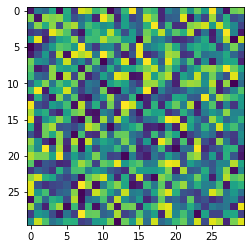

In [17]:
# kwl - ROI pooling initial (2/25/23)

# Array for testing - dummy 30x30 feature map
testImage = np.random.rand(30,30)
for x in range(0,30):
  for y in range(0,30):
    testImage[x][y] = int(testImage[x][y] * 255)
print(testImage)
plt.imshow(testImage)

In [21]:
# Creating mock ROI boundaries & output map size
roiCorners = [5, 5, 20, 25]
outSize = [3, 3]

In [22]:
def imgPooling(imageIn, ROI, poolSize):

  region = imageIn[ROI[0]:ROI[2],ROI[1]:ROI[3]] # Extracting ROI from image using input coordinates
  # Note: This will probably later have to be changed to use the center, not two corners like it is right now

  regionW, regionH = region.shape

  windowW = int(regionW / poolSize[0])
  windowH = int(regionH / poolSize[1])
  print(windowW, windowH)
  # Determining the size of one window

  arrayOut = np.zeros((poolSize[0],poolSize[1]))

  # Iterating through each window and taking max value
  for i in range (0, (poolSize[0])):
    for j in range (0, (poolSize[1])):
      
      windowTL = (windowW * i)
      windowTR = (windowW * (i + 1))
      windowBL = (windowH * j)
      windowBR = (windowH * (j + 1))

      window = region[windowTL:windowTR,windowBL:windowBR]

      maxVal = np.amax(window)
      maxVal = np.amax(maxVal,0)
      
      arrayOut[i][j] = maxVal

  return(arrayOut)

5 6
[[254. 253. 243.]
 [236. 254. 225.]
 [232. 229. 253.]]


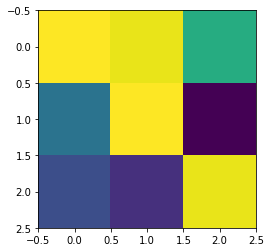

In [23]:
# Test block - using randomly generated values from above
pooledImg = imgPooling(testImage, roiCorners, outSize)
print(pooledImg)
plt.imshow(pooledImg)